In [147]:
#######################################################
#Project: Investment Clustering
#Author: Amin Boroomand
#Date: March 2023
# Version:I
#
#######################################################

This code converts each PDF file into a vector using the word-to-vector technique. Subsequently, it performs clustering on the files and assigns them to appropriate clusters based on their word-to-vector scores.

In [148]:
#Imports
import os
import fitz  # PyMuPDF, actively maintained PDF library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering #clustering methods
from skfuzzy.cluster import cmeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import NMF, LatentDirichletAllocation
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
#set working directory
pdf_path = '/Users/amin/Desktop/33'

In [165]:
# Read the text from each PDF files
pdf_text = []
for filename in os.listdir(pdf_path):
    if filename.endswith('.pdf'):
        with fitz.open(os.path.join(pdf_path, filename)) as doc:
            text = ''
            for page in doc:
                text += page.get_text()
            pdf_text.append(text)


['C O M PA N Y  N O T E\nJ a n u a r y  5 ,  2 0 2 3\nTCR2 Therapeutics, Inc. (TCRR)\n  Overweight \nTakes Needed Restructuring Step; Updated Data Timeline Implies Positive Trends\nPRICE: US$1.05\nTARGET: US$10.00\nDCF of FY2024E–2029E free cash flows\ndiscounted at 17% (WACC of 7.9%) with a\n3.0% terminal growth rate\nDo Kim\nSr. Research Analyst, Piper Sandler & Co.\n212 284-9488, do.kim@psc.com\nSchuyler Van Den Broek\nResearch Analyst, Piper Sandler & Co.\n212 284-9402,\nSchuyler.VanDenBroek@psc.com\nChanges\nPrevious\nCurrent\nRating\n—\nOverweight\nPrice Tgt\nUS$8.00\nUS$10.00\nFY23E Rev (mil)\n—\nUS$0.0\nFY24E Rev (mil)\n—\nUS$0.0\nFY23E EPS\nUS$(3.99)\nUS$(1.91)\nFY24E EPS\nUS$(4.02)\nUS$(1.55)\n52-Week High / Low\nUS$4.71 / US$0.82\nShares Out (mil)\n38.7\nMarket Cap. (mil)\nUS$40.7\nAvg Daily Vol (000)\n294\nDiv Yield\n0.00%\nFiscal Year End\nDec\nPrice Performance - 1 Year\nJan-22\nMar-22 May-22\nJul-22\nSep-22 Nov-22\nJan-23\n4.5\n4\n3.5\n3\n2.5\n2\n1.5\n1\n0.5\nUSD\nSource

In [151]:
# Preprocesing the text, using the TfidfVectorizer 
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_text = vectorizer.fit_transform(pdf_text)

  (0, 1)	0.8429263481500496
  (0, 0)	0.5380289691033573


KMeans Silhouette Score: 0.028722159943156477
KMeans Clustering Results:
Cluster 1:
  CG_GRNA_IOC_12.8.22.pdf
  LT_AVXL_NOTE_6.22.21.pdf
Cluster 2:
  G_ACET_IOC_4.8.21.pdf
  B_RXRX_IOC_9.21.21.pdf
  WB_VOR_IOC_1.25.22.pdf
Cluster 3:
  PS_TCRR_NOTE_1.5.23.pdf
  JPM_SRZN_NOTE_11.28.22.pdf
  E_FNCH_IOC_8.10.21.pdf
Cluster 4:
  KBC_MAAT.FR_IOC_12.14.21.pdf
Cluster 5:
  LT_PHGE_IOC_4.15.21.pdf


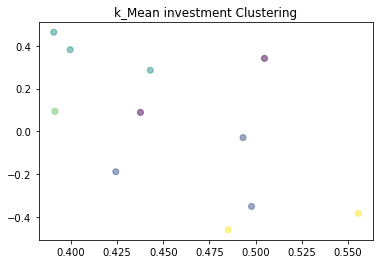

In [152]:
# Cluster the investments using KMeans and evaluate it with Silhouette Score
n_clusters = 5
km = KMeans(n_clusters=n_clusters)
km.fit(vectorized_text)

#computing the Silhouette score
if len(set(km.labels_)) > 1:
    km_silhouette_score = silhouette_score(vectorized_text, km.labels_)
    print(f'KMeans Silhouette Score: {km_silhouette_score}')
else:
    print("There is only one cluster: NO Silhouette Score ") 
    
#printing Clusters    
print('KMeans Clustering Results:')
for i in range(n_clusters):
    print(f'Cluster {i+1}:')
    for j, filename in enumerate(os.listdir(pdf_path)):
        if filename.endswith('.pdf') and j < len(pdf_text) and km.labels_[j] == i:
            print(f'  {filename}')
            
 # Plot the K-mean clustering result
pca = TruncatedSVD(n_components=2, random_state=42)
vectorized_text_2d = pca.fit_transform(vectorized_text)
x = vectorized_text_2d[:, 0]
y = vectorized_text_2d[:, 1]
plt.scatter(x, y, c=km.labels_, alpha=0.5)
plt.title('k_Mean investment Clustering')
plt.show()           

There is only one cluster: NO Silhouette Score 
DBSCAN Clustering Results:
Noise:
  PS_TCRR_NOTE_1.5.23.pdf
  JPM_SRZN_NOTE_11.28.22.pdf
  G_ACET_IOC_4.8.21.pdf
  B_RXRX_IOC_9.21.21.pdf
  KBC_MAAT.FR_IOC_12.14.21.pdf
  WB_VOR_IOC_1.25.22.pdf
  E_FNCH_IOC_8.10.21.pdf
  CG_GRNA_IOC_12.8.22.pdf
  LT_AVXL_NOTE_6.22.21.pdf
  LT_PHGE_IOC_4.15.21.pdf


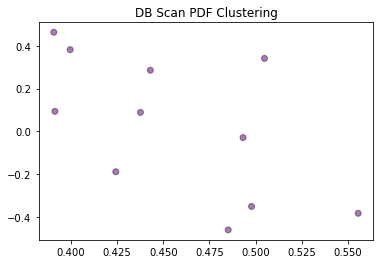

In [153]:
# Cluster the PDF files using DBSCAN and evaluate with Silhoutte score
dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan.fit(vectorized_text.toarray())
unique_labels = set(dbscan.labels_)

#computing the Silhouette score
if len(unique_labels) > 1:
    dbscan_silhouette_score = silhouette_score(vectorized_text, dbscan.labels_)
    print(f'DB Scan Silhouette Score: {dbscan_silhouette_score }')
else:
    print("There is only one cluster: NO Silhouette Score ")
    
#printing Clusters    
print('DBSCAN Clustering Results:')
for i in unique_labels:
    if i == -1:
        print('Noise:')
    else:
        print(f'Cluster {i+1}:')
    for j, filename in enumerate(os.listdir(pdf_path)):
        if filename.endswith('.pdf') and j < len(pdf_text) and dbscan.labels_[j] == i:
            print(f'  {filename}')
            
# DB_scan Plot the clustering result
pca = TruncatedSVD(n_components=2, random_state=42)
vectorized_text_2d = pca.fit_transform(vectorized_text)
x = vectorized_text_2d[:, 0]
y = vectorized_text_2d[:, 1]
plt.scatter(x, y, c=dbscan.labels_, alpha=0.5)
plt.title('DB Scan PDF Clustering')
plt.show()

Affinity Propagation Silhouette Score: 0.02369985090706892
Affinity Propagation Clustering Results:
Cluster 1:
  JPM_SRZN_NOTE_11.28.22.pdf
  B_RXRX_IOC_9.21.21.pdf
  WB_VOR_IOC_1.25.22.pdf
Cluster 2:
  KBC_MAAT.FR_IOC_12.14.21.pdf
Cluster 3:
  PS_TCRR_NOTE_1.5.23.pdf
  E_FNCH_IOC_8.10.21.pdf
  CG_GRNA_IOC_12.8.22.pdf
  LT_AVXL_NOTE_6.22.21.pdf
Cluster 4:
  G_ACET_IOC_4.8.21.pdf
  LT_PHGE_IOC_4.15.21.pdf


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


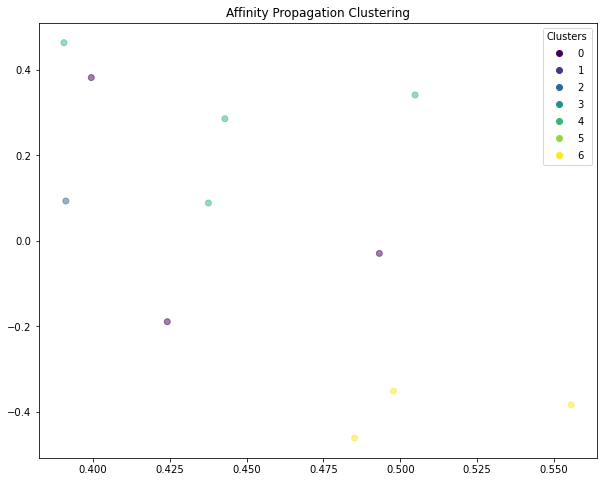

In [154]:
# Cluster the PDF files using Affinity Propagation
affinity_propagation = AffinityPropagation()
affinity_propagation.fit(vectorized_text.toarray())

#computing the Silhouette score
if len(set(affinity_labels)) > 1:
    affinity_propagation_silhouette_score = silhouette_score(vectorized_text, affinity_propagation.labels_)
    print(f'Affinity Propagation Silhouette Score: {affinity_propagation_silhouette_score}')
else:
    print("There is only one cluster: NO Silhouette Score ")

#printing Clusters 
print('Affinity Propagation Clustering Results:')
cluster_centers_indices = affinity_propagation.cluster_centers_indices_
affinity_labels = affinity_propagation.labels_
unique_labels = set(affinity_labels)
for i in unique_labels:
    print(f'Cluster {i+1}:')
    for j, filename in enumerate(os.listdir(pdf_path)):
        if filename.endswith('.pdf') and j < len(pdf_text) and affinity_labels[j] == i:
            print(f'  {filename}')
            
# Plot the clustering results for Affinity Propagation
fig, ax = plt.subplots(figsize=(10, 8))
affinity_pca = TruncatedSVD(n_components=2, random_state=42)
affinity_2d = affinity_pca.fit_transform(vectorized_text)
x = affinity_2d[:, 0]
y = affinity_2d[:, 1]
plt.scatter(x, y, c=affinity_labels, alpha=0.5)
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
plt.title('Affinity Propagation Clustering')
plt.show()

Agglomerative Clustering Silhouette Score: 0.02434939060304238
Agglomerative Clustering Results:
Cluster 1:
  E_FNCH_IOC_8.10.21.pdf
  LT_PHGE_IOC_4.15.21.pdf
Cluster 2:
  G_ACET_IOC_4.8.21.pdf
  B_RXRX_IOC_9.21.21.pdf
  WB_VOR_IOC_1.25.22.pdf
Cluster 3:
  PS_TCRR_NOTE_1.5.23.pdf
  JPM_SRZN_NOTE_11.28.22.pdf
Cluster 4:
  KBC_MAAT.FR_IOC_12.14.21.pdf
Cluster 5:
  CG_GRNA_IOC_12.8.22.pdf
  LT_AVXL_NOTE_6.22.21.pdf


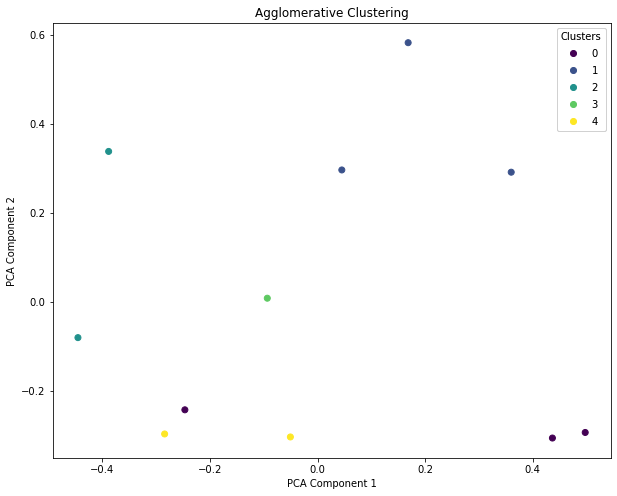

In [155]:
# Cluster the PDF files using Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='complete')
agglomerative.fit(vectorized_text.toarray())


#computing the Silhouette score
if len(set(agglomerative.labels_)) > 1:
    agglomerative_silhouette_score = silhouette_score(vectorized_text, agglomerative.labels_)
    print(f'Agglomerative Clustering Silhouette Score: {agglomerative_silhouette_score}')
else:
    print("There is only one cluster: NO Silhouette Score ")

#printing the clusters
print('Agglomerative Clustering Results:')
for i in range(n_clusters):
    print(f'Cluster {i+1}:')
    for j, filename in enumerate(os.listdir(pdf_path)):
        if filename.endswith('.pdf') and j < len(pdf_text) and agglomerative.labels_[j] == i:
            print(f'  {filename}')
            
# Perform PCA to reduce dimensionality to 2 for the plot
pca = PCA(n_components=2)
vectorized_text_2d = pca.fit_transform(vectorized_text.toarray())

# Plot scatter plot for Agglomerative clustering
fig, ax = plt.subplots(figsize=(10, 8))
x=vectorized_text_2d[:,0]
y=vectorized_text_2d[:,1]
scatter = ax.scatter(x, y, c=agglomerative.labels_, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()          

FCM Silhouette Score: 0.02144831786993567
FCM Clustering Results:
Cluster 1:
  B_RXRX_IOC_9.21.21.pdf
  WB_VOR_IOC_1.25.22.pdf
Cluster 2:
Cluster 3:
  PS_TCRR_NOTE_1.5.23.pdf
  JPM_SRZN_NOTE_11.28.22.pdf
  E_FNCH_IOC_8.10.21.pdf
  CG_GRNA_IOC_12.8.22.pdf
Cluster 4:
  KBC_MAAT.FR_IOC_12.14.21.pdf
Cluster 5:
Cluster 6:
  LT_AVXL_NOTE_6.22.21.pdf
Cluster 7:
  G_ACET_IOC_4.8.21.pdf
  LT_PHGE_IOC_4.15.21.pdf


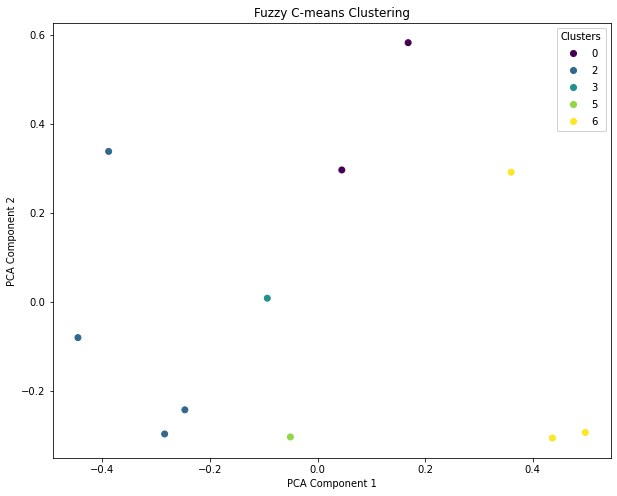

In [156]:
# Cluster the PDF files using Fuzzy C-means (FCM)
n_clusters = 7
fcm = cmeans(vectorized_text.toarray().T, n_clusters, 2, error=0.005, maxiter=1000)
fcm_labels = fcm[1].argmax(axis=0)

#silhouette_score
fcm_silhouette_score = silhouette_score(vectorized_text, fcm_labels)
print(f'FCM Silhouette Score: {fcm_silhouette_score}')




#clusters
print('FCM Clustering Results:')
for i in range(n_clusters):
    print(f'Cluster {i+1}:')
    for j, filename in enumerate(os.listdir(pdf_path)):
        if filename.endswith('.pdf') and j < len(pdf_text) and fcm_labels[j] == i:
            print(f'  {filename}')
            
           

# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
vectorized_text_2d = pca.fit_transform(vectorized_text.toarray())

# Plot scatter plot for Fuzzy C-means clustering
fig, ax = plt.subplots(figsize=(10, 8))
x=vectorized_text_2d[:,0]
y=vectorized_text_2d[:,1]
scatter = ax.scatter(x, y, c=fcm_labels, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)
plt.title('Fuzzy C-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


NMF Silhouette score:  0.025166541541216947
NMF Clustering Results:
Cluster 1:
  LT_PHGE_IOC_4.15.21.pdf
Cluster 2:
  PS_TCRR_NOTE_1.5.23.pdf
  JPM_SRZN_NOTE_11.28.22.pdf
  KBC_MAAT.FR_IOC_12.14.21.pdf
  E_FNCH_IOC_8.10.21.pdf
  CG_GRNA_IOC_12.8.22.pdf
  LT_AVXL_NOTE_6.22.21.pdf
Cluster 3:
  G_ACET_IOC_4.8.21.pdf
  B_RXRX_IOC_9.21.21.pdf
  WB_VOR_IOC_1.25.22.pdf


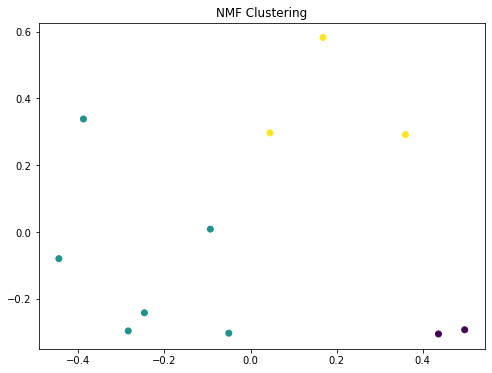

In [157]:
# Cluster with Non-negative Matrix Factorization (NMF)
nmf = NMF(n_components=3, random_state=42)
nmf.fit(vectorized_text)
nmf_labels = nmf.transform(vectorized_text).argmax(axis=1)
nmf_silhouette_score = silhouette_score(vectorized_text, nmf_labels)
print("NMF Silhouette score: ", nmf_silhouette_score)


#clusters
print('NMF Clustering Results:')

for i in range(len(set(nmf_labels))):
    print(f'Cluster {i+1}:')
    for j, filename in enumerate(os.listdir(pdf_path)):
        if filename.endswith('.pdf') and j < len(pdf_text) and nmf_labels[j] == i:
            print(f'  {filename}')

# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
vectorized_text_2d = pca.fit_transform(vectorized_text.toarray())
#plot
x=vectorized_text_2d[:,0]
y=vectorized_text_2d[:,1]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=nmf_labels)
plt.title("NMF Clustering")
plt.show()

There is only one cluster: NO Silhouette Score 


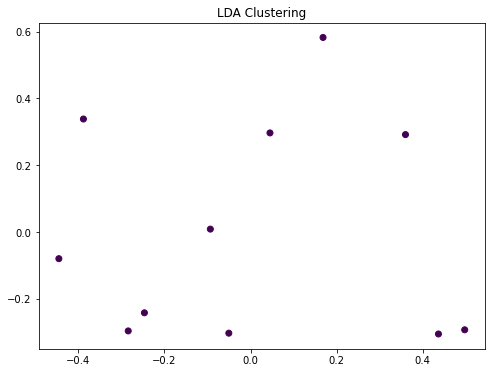

In [158]:
# Cluster with Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(vectorized_text)
lda_labels = lda.transform(vectorized_text).argmax(axis=1)

#silhouette_score
if len(set(lda_labels)) > 1:
    lda_silhouette_score = silhouette_score(vectorized_text, lda_labels)
    print("LDA Silhouette score: ", lda_silhouette_score)
else:
    print("There is only one cluster: NO Silhouette Score ")

    
# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
vectorized_text_2d = pca.fit_transform(vectorized_text.toarray())
#plot
x=vectorized_text_2d[:,0]
y=vectorized_text_2d[:,1]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=lda_labels)
plt.title("LDA Clustering")
plt.show()